In [13]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [14]:
df_pc = pd.read_csv("baz_jup_pc_posterior_exclusion.csv")
df_ooplasm = pd.read_csv("baz_jup_ooplasm_posterior_exclusion.csv")
df_nonpolar = pd.read_csv("baz_jup_nonpc_posterior_exclusion.csv")
df_par1_jup_short = pd.read_csv("par1_jup_short_posterior_exclusion.csv")
df_par1_jup_long = pd.read_csv("par1_jup_long_posterior_exclusion.csv")
df_par1_baz_par1 = pd.read_csv("par1_baz_posterior_exclusion_par1.csv")
df_par1_baz_baz = pd.read_csv("par1_baz_posterior_exclusion_baz.csv")

In [17]:
def get_ratio(df, statistic = "mean"):
    before = (df["before_posterior_"+statistic]-df["before_background_"+statistic])/(df["before_lateral_"+statistic]-df["before_background_"+statistic])
    after = (df["after_posterior_"+statistic]-df["after_background_"+statistic])/(df["after_lateral_"+statistic]-df["after_background_"+statistic])
    #before = (df.before_lateral_mean-df.before_posterior_mean)
    #after = (df.after_lateral_mean-df.after_posterior_mean)


    return before, after


def box_plot(data, position, edge_color, fill_color, linewidth, dot_size):
    #bp = ax.boxplot(data, positions=position, patch_artist=True)#, whiskerprops = dict(linewidth=0.5))
    
    """
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, linewidth = linewidth)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color, alpha=0.5)

    for outlier in bp['fliers']:
        outlier.set(markersize= dot_size, color=fill_color, markeredgecolor=fill_color) """

    for d, p in zip(data, position):
    # Add some random "jitter" to the x-axis
        x = np.random.normal(p, 0.04, size=len(d))
        #ax.plot(x, d, '.', color='black',alpha=1, size=dot_size)
        ax.scatter(x,d,s=dot_size, color='black')
        
    #return bp

def no_box_plot(data, position, edge_color, fill_color, linewidth, dot_size):
    bp = ax.boxplot(data, positions=position, patch_artist=True)#, whiskerprops = dict(linewidth=0.5))
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, linewidth = 0, alpha=0)


    for d, p in zip(data, position):
    # Add some random "jitter" to the x-axis
        x = np.random.normal(p, 0.04, size=len(d))
        #ax.plot(x, d, '.', color='black',alpha=1, size=dot_size)
        ax.scatter(x,d,s=dot_size, color=fill_color)
        
    return bp


In [18]:
statistic = "mean"
before_pc, after_pc = get_ratio(df_pc, statistic)
before_ooplasm, after_ooplasm = get_ratio(df_ooplasm, statistic)
before_nonpolar, after_nonpolar = get_ratio(df_nonpolar, statistic)
before_par1_jup_short, after_par1_jup_short = get_ratio(df_par1_jup_short, statistic)
before_par1_jup_long, after_par1_jup_long = get_ratio(df_par1_jup_long, statistic)
before_par1_baz_par1, after_par1_baz_par1 = get_ratio(df_par1_baz_par1, statistic)
before_par1_baz_baz, after_par1_baz_baz = get_ratio(df_par1_baz_baz, statistic)

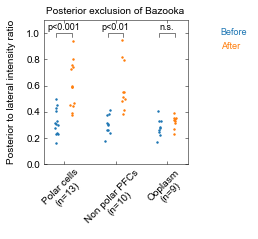

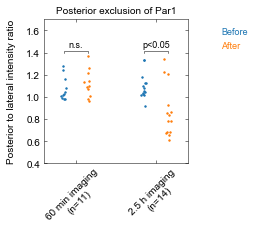

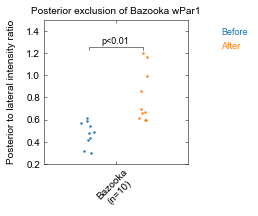

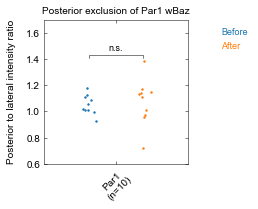

In [24]:
## Plotting
COLOR = 'black'
#COLOR = 'white'
plot_size="small"
#plot_size="big"

show_boxplot = False

mpl.rcParams['font.family'] = 'Arial'

if plot_size=="small":
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.linewidth'] = 0.5
    fig_width=2
    fig_height=2
    tick_size=3
else:
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.linewidth'] = 1
    fig_width=5
    fig_height=5
    tick_size=7


mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Make text editable in illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


#ax.boxplot([before_pc,after_pc, before_nonpolar, after_nonpolar, before_ooplasm,after_ooplasm], labels=["Before pc", "After pc", "Before ooplasm", "After ooplasm", "Before nonpolar", "After nonpolar"])
#ax.boxplot([before_par1_jup_short, after_par1_jup_short, before_par1_jup_long, after_par1_jup_long])
#ax.boxplot([before_par1_jup_short, after_par1_jup_short, before_par1_jup_long, after_par1_jup_long, before_par1_baz_par1, after_par1_baz_par1])
#ax.boxplot([before_par1_baz_baz, after_par1_baz_baz])
#



def get_plots(before_data, after_data, x_labels, before_color, after_color):
    max_datapoint = max([d for data in before_data for d in data] + [d for data in after_data for d in data])
    min_datapoint = min([d for data in before_data for d in data] + [d for data in after_data for d in data])

    label_positions = np.arange(len(x_labels))*2+1
    x_labels = [label+"\n(n="+str(len(d))+")" for label, d in zip(x_labels, before_data)]

    space_between_bars = 0.3
    before_positions = [l-space_between_bars for l in label_positions]
    after_positions = [l+space_between_bars for l in label_positions]

    if show_boxplot:
        bp_before = box_plot(before_data, before_positions, 'black', before_color, plt.rcParams['axes.linewidth'], plt.rcParams['axes.linewidth']*4)
        bp_after = box_plot(after_data, after_positions, 'black', after_color, plt.rcParams['axes.linewidth'], plt.rcParams['axes.linewidth']*4)
        ax.legend([bp_before["boxes"][0], bp_after["boxes"][0]], ['Before', 'After'], bbox_to_anchor=(1, 1), loc='upper left', prop={'size': plt.rcParams['font.size']*0.9}, fancybox=True, framealpha=0.0)
    
    else:
        no_box_plot(before_data, before_positions, 'black', before_color, plt.rcParams['axes.linewidth'], plt.rcParams['axes.linewidth']*4)
        no_box_plot(after_data, after_positions, 'black', after_color, plt.rcParams['axes.linewidth'], plt.rcParams['axes.linewidth']*4)
        ax.legend(['Before', 'After'], labelcolor =[before_color, after_color], bbox_to_anchor=(1, 1), loc='upper left', prop={'size': plt.rcParams['font.size']*0.9}, framealpha=0.0, markerscale=5000)
    
    ax.set_xticks(label_positions)
    ax.set_xticklabels(x_labels)

    yticks_diff = ax.get_yticks()[1]-ax.get_yticks()[0]
    yticks_max = ax.get_yticks()[-1]
    yticks_min = ax.get_yticks()[0]


    # statistical annotation
    for before, after, position in zip(before_data, after_data, before_positions):
        p_value = stats.wilcoxon(before, after)[1]
        if p_value > 0.05: significance = "n.s."
        elif p_value<0.05 and p_value>0.01: significance = "p<0.05"
        elif p_value<0.01 and p_value>0.001: significance = "p<0.01"
        elif p_value<0.001 and p_value>0.0001: significance = "p<0.001"
        else: significance = "p<0.0001"

        x1, x2 = position, position + space_between_bars*2
        y, h, col = max_datapoint+yticks_diff/8, yticks_diff/8, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=plt.rcParams['axes.linewidth'], c=col) #line
        plt.text((x1+x2)*.5, y+h*1.5, significance, ha='center', va='bottom', color=col, size=plt.rcParams['font.size']*0.9) #text

        
    ax.set_ylim([yticks_min, yticks_max+yticks_diff/2])
   




'''
#Baz data
x_labels = ["Polar cells", "Non polar PFCs", "Ooplasm"]
before_data = [before_pc, before_nonpolar, before_ooplasm]
after_data = [after_pc, after_nonpolar, after_ooplasm]

'''

'''
#Par1 data
x_labels = ["60 min imaging", "2.5 h imaging"]
before_data = [before_par1_jup_short,  before_par1_jup_long]
after_data = [after_par1_jup_short, after_par1_jup_long]
'''

before_experiments = [[before_pc, before_nonpolar, before_ooplasm], [before_par1_jup_short,  before_par1_jup_long], [before_par1_baz_baz], [before_par1_baz_par1]] 
after_experiments = [[after_pc, after_nonpolar, after_ooplasm], [after_par1_jup_short, after_par1_jup_long], [after_par1_baz_baz], [after_par1_baz_par1]]
x_labels_experiments = [["Polar cells", "Non polar PFCs", "Ooplasm"], ["60 min imaging", "2.5 h imaging"], ["Bazooka"], ["Par1"]]
titles_experiments = ["Posterior exclusion of Bazooka", "Posterior exclusion of Par1", "Posterior exclusion of Bazooka wPar1", "Posterior exclusion of Par1 wBaz"]

#before_color = sns.color_palette("tab10")[0]
#after_color = sns.color_palette("tab10")[1]

before_color = sns.color_palette()[0]
after_color = sns.color_palette()[1]

for before_data, after_data, x_labels, title in zip(before_experiments, after_experiments, x_labels_experiments, titles_experiments):
    # Create figure object and store it in a variable called 'fig'
    fig = plt.figure(figsize=(fig_width, fig_height))

    # Add axes object to the figure that takes up entire figure
    ax = fig.add_axes([0, 0, 1, 1])

    # Edit the major and minor ticks of the x and y axes
    ax.xaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')

    # Add the x and y-axis labels
    ax.set_ylabel('Posterior to lateral intensity ratio', labelpad=10)
    plt.title(title, fontsize=plt.rcParams['font.size'])
    plt.xticks(rotation=45)
    get_plots(before_data, after_data, x_labels, before_color, after_color)


    fig.savefig(f'{title}_{COLOR}_{plot_size}_boxplot-{str(show_boxplot)}.pdf', dpi=300, transparent=True, bbox_inches='tight')
    fig.savefig(f'{title}_{COLOR}_{plot_size}_boxplot-{str(show_boxplot)}.png', dpi=300, transparent=True, bbox_inches='tight')

In [39]:
before_color

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [25]:
stats.wilcoxon(before_par1_jup_short, after_par1_jup_short)

WilcoxonResult(statistic=24.0, pvalue=0.46484375)

In [26]:
stats.wilcoxon(before_par1_jup_long, after_par1_jup_long)

WilcoxonResult(statistic=13.0, pvalue=0.0107421875)

In [27]:
stats.wilcoxon(before_par1_baz_par1, after_par1_baz_par1)

WilcoxonResult(statistic=23.0, pvalue=0.6953125)

In [28]:
stats.wilcoxon(before_pc, after_pc)[1]

0.000244140625

In [29]:
stats.wilcoxon(before_nonpolar, after_nonpolar)

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

In [30]:
stats.wilcoxon(before_ooplasm, after_ooplasm)

WilcoxonResult(statistic=11.0, pvalue=0.203125)

In [31]:
stats.wilcoxon(before_par1_baz_baz, after_par1_baz_baz)

WilcoxonResult(statistic=0.0, pvalue=0.001953125)

In [32]:
stats.mannwhitneyu(after_pc, after_ooplasm)

MannwhitneyuResult(statistic=2.0, pvalue=9.216723266714534e-05)

In [33]:
stats.mannwhitneyu(before_pc, before_ooplasm)

MannwhitneyuResult(statistic=46.0, pvalue=0.21146838192952833)

In [ ]:
before_pc

0     4.278562
1     2.349441
2     3.365921
3     3.234914
4     4.236164
5     2.483127
6     2.205966
7     2.007479
8     4.364522
9     3.218679
10    3.593369
11    3.003921
12    6.313250
dtype: float64

In [ ]:
after_ooplasm

0    2.836353
1    2.544029
2    3.219553
3    2.948902
4    4.361847
5    3.061314
6    3.733217
7    2.824581
8    2.871925
dtype: float64

In [ ]:
print(np.mean(before_ooplasm), np.mean(after_ooplasm))

3.8059848041601105 3.155746886408725


In [ ]:
print(np.mean(before_pc), np.mean(after_pc))

3.435024133314017 1.7896799332761684
